# electromkm demo: HER with random values

## MKM class import, object instance and attributes overview

In [1]:
import sys
sys.path.insert(0, "../") 
from electromkm import electroMKM

In [2]:
model = electroMKM('HER',
                   'rm.mkm', 
                   'g.mkm', 
                    t_ref=298)

# Model exploration
To investigate the characteristics of the system under study, several attributes can be easily inspected to check general information like number of elementary reactions, energetics, reaction network, etc.

In [3]:
print(model)

System: HER

2H(e) -> H2(g)

Number of global reactions: 1
Number of elementary reactions: 2
Number of surface species: 3
Number of gas species: 1



### Defined species in the system

N.B. H(e) is used to define H+ + e-.

In [4]:
model.species_tot

['*', 'H(e)', 'H*', 'H2(g)']

### Visualize Gibbs energetics of the system

Reaction types: 'ads'=adsorption
                'des'=desorption
                'sur'=surface reaction. 
The suffix "+e" means that that elementary reaction is a charge-transfer step.

In [5]:
model.df_gibbs

,,DGR / eV,DG barrier / eV,DG reverse barrier / eV
R1,sur+e,-0.03,0.57,0.6
R2,des,0.05,0.05,0.0


### Stoichiometric matrix of the reaction network

In [6]:
model.df_system

,R1,R2
,sur+e,des
species,,
*,-1,2
H(e),-1,0
H*,1,-2
H2(g),0,1


# Microkinetic run

Up to now, it is possible to run steady state runs. The inputs that must be given to the function are the applied overpotential and the pH of the electrolyte solution.
The output of the function is a dictionary containing information related to the performed simulation.

In [7]:
help(electroMKM.kinetic_run)

Help on function kinetic_run in module electromkm:

kinetic_run(self, overpotential, pH, initial_conditions=None, temperature=298.0, pressure=100000.0, verbose=0, jac=True)
    Simulates a steady-state catalytic run at the desired reaction conditions.        
    Args:
        overpotential(float): applied overpotential [V].
        pH(float): pH of the electrolyte solution [-].
        temperature(float): Temperature of the experiment [K].
        pressure(float): Total abs. pressure of the system [Pa].
        initial_conditions(nparray): initial coverage of the catalyst surface [-].
        verbose(int): 0=print all output; 1=print nothing.        
    Returns:
        (dict): Full report of the electrocatalytic simulation.



In [8]:
exp = model.kinetic_run(-0.2, 7, jac=False)

HER: Microkinetic run
Overpotential = -0.2V    pH = 7
Temperature = 298.0K    Pressure = 1.0bar

HER Current density: -2.36e-04 mA cm-2
HER Selectivity: 100.00%
Most Abundant Surface Intermediate: * Coverage: 100.00% 
CPU time: 0.10 s


In [9]:
exp

{'T': 298.0,
 'P': 1.0,
 'theta': {'*': 0.9999999711807314,
  'H(e)': 1e-07,
  'H*': 2.8819269077789505e-08},
 'ddt': {'*': 0.0, 'H(e)': 0.0, 'H*': 0.0, 'H2(g)': 0.0},
 'r': {'R1': 0.0014717236940115525, 'R2': 0.0007358618470057763},
 'r_HER': 0.0014717236940115525,
 'j_HER': -0.002357961313679812,
 'S_HER': 1.0,
 'MASI': {'*': 99.99999711807314},
 'solver':   message: 'The solver successfully reached the end of the integration interval.'
      nfev: 1438
      njev: 2
       nlu: 149
       sol: None
    status: 0
   success: True
         t: array([0.00000000e+00, 9.60887559e-50, 1.92177512e-49, 1.15306507e-48,
        2.11395263e-48, 1.17228282e-47, 2.13317038e-47, 1.17420460e-46,
        2.13509216e-46, 1.17439678e-45, 2.13528433e-45, 1.17441599e-44,
        2.13530355e-44, 1.17441791e-43, 2.13530547e-43, 1.17441811e-42,
        2.13530567e-42, 1.17441813e-41, 2.13530569e-41, 1.17441813e-40,
        2.13530569e-40, 3.09619325e-40, 1.27050688e-39, 2.23139444e-39,
        1.18402700e

The first check should be about the reaching of the steady state in the model. This means that all the derivatives in the ODE equal to zero. These values can be easily visualized with the key 'ddt':

In [10]:
exp['ddt']

{'*': 0.0, 'H(e)': 0.0, 'H*': 0.0, 'H2(g)': 0.0}

Once steady state conditions have been checked, the solution can be easily analyzed. the main output consists of steady state surface coverage and reaction rate in term of current density.

In [11]:
exp['theta']

{'*': 0.9999999711807314, 'H(e)': 1e-07, 'H*': 2.8819269077789505e-08}

In [12]:
exp['MASI']

{'*': 99.99999711807314}

Negative current density means reduction is occurring, while positive values means that reaction is evolving in the opposite direction. Values of current density are stored in mA cm-2.

In [13]:
exp['j_HER']

-0.002357961313679812

In [16]:
import numpy as np
n = np.array([-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
print(n)

[-0.3 -0.2 -0.1  0.   0.1  0.2  0.3]


HER: Microkinetic run
Overpotential = -0.3V    pH = 7
Temperature = 298.0K    Pressure = 1.0bar

HER Current density: -7.58e-04 mA cm-2
HER Selectivity: 100.00%
Most Abundant Surface Intermediate: * Coverage: 100.00% 
CPU time: 0.42 s
U = -0.3 V vs SHE    j = -0.007584246311581187
HER: Microkinetic run
Overpotential = -0.2V    pH = 7
Temperature = 298.0K    Pressure = 1.0bar

HER Current density: -2.36e-04 mA cm-2
HER Selectivity: 100.00%
Most Abundant Surface Intermediate: * Coverage: 100.00% 
CPU time: 0.08 s
U = -0.2 V vs SHE    j = -0.002357961313679812
HER: Microkinetic run
Overpotential = -0.1V    pH = 7
Temperature = 298.0K    Pressure = 1.0bar

HER Current density: -7.32e-05 mA cm-2
HER Selectivity: 100.00%
Most Abundant Surface Intermediate: * Coverage: 100.00% 
CPU time: 9.16 s
U = -0.1 V vs SHE    j = -0.0007324041376670485
HER: Microkinetic run
Overpotential = 0.0V    pH = 7
Temperature = 298.0K    Pressure = 1.0bar

HER Current density: -2.22e-05 mA cm-2
HER Selectivity: 1

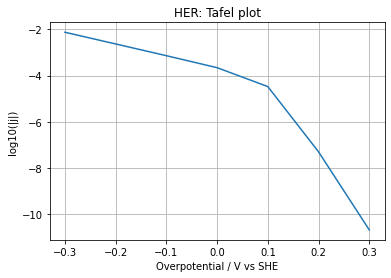

array([-7.58424631e-03, -2.35796131e-03, -7.32404138e-04, -2.21683679e-04,
       -3.36267534e-05, -5.02473040e-08, -2.09262588e-11])

In [17]:
model.j_U("HER", n,7, jac=False)